In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from utils import confidence_ellipse

/home/vc/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('bayes_features.csv')
data.head()

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


Text(0, 0.5, 'negative')

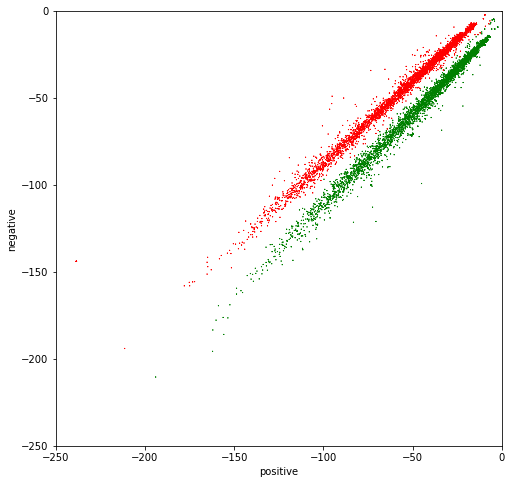

In [4]:
fig, ax = plt.subplots(figsize = (8,8))
colors = ['red','green']
ax.scatter(data.positive,data.negative,c=[colors[int(k)] for k in data.sentiment],s=0.1,marker="*")
plt.xlim(-250,0)
plt.ylim(-250,0)
plt.xlabel("positive")
plt.ylabel("negative")

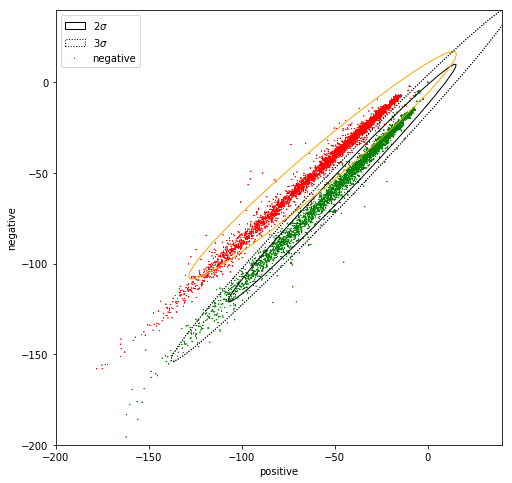

In [7]:
#Building confidence ellipses on top of the above data
fig, ax = plt.subplots(figsize = (8,8))
colors = ['red','green']
ax.scatter(data.positive,data.negative,c=[colors[int(k)] for k in data.sentiment],s=0.1,marker="*")
plt.xlim(-200,40)
plt.ylim(-200,40)
plt.xlabel("positive")
plt.ylabel("negative")

data_pos = data[data.sentiment==1.0]
data_neg = data[data.sentiment==0.0]

confidence_ellipse(data_pos.positive,data_pos.negative,ax,n_std=2,edgecolor='black',label=r'$2\sigma$')
confidence_ellipse(data_neg.positive,data_neg.negative,ax,n_std=2,edgecolor='orange')

confidence_ellipse(data_pos.positive,data_pos.negative,ax,n_std=3,edgecolor='black',linestyle=":",label=r'$3\sigma$')
confidence_ellipse(data_pos.positive,data_pos.negative,ax,n_std=3,edgecolor='black',linestyle=":")
ax.legend()
plt.show()

In [8]:
data2 = data.copy() # Copy the whole data frame

# The following 2 lines only modify the entries in the data frame where sentiment == 1
data2.negative[data.sentiment == 1] =  data2.negative * 1.5 + 50 # Modify the negative attribute
data2.positive[data.sentiment == 1] =  data2.positive / 1.5 - 50 # Modify the positive attribute 

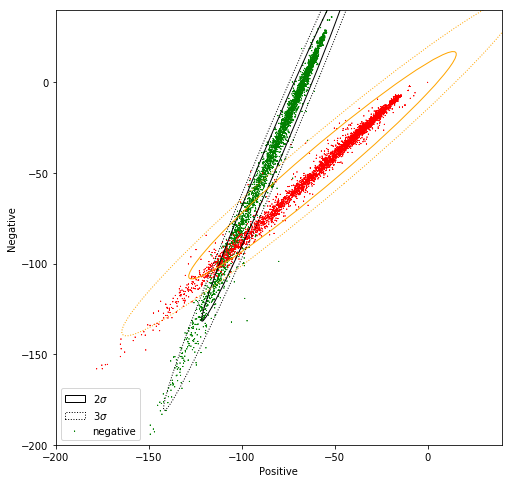

In [9]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete

# Color base on sentiment

#data.negative[data.sentiment == 1] =  data.negative * 2

ax.scatter(data2.positive, data2.negative, c=[colors[int(k)] for k in data2.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet
# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data2[data2.sentiment == 1] # Filter only the positive samples
data_neg = data[data2.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend()

plt.show()